In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import random
random.seed(9179)

In [3]:
df = pd.read_csv("GS.csv")
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     1999-05-04   76.000000   77.250000   70.000000   70.375000   54.176796   
1     1999-05-05   69.875000   69.875000   66.250000   69.125000   53.214500   
2     1999-05-06   68.000000   69.375000   67.062500   67.937500   52.300339   
3     1999-05-07   67.937500   74.875000   66.750000   74.125000   57.063652   
4     1999-05-10   73.375000   73.500000   70.250000   70.687500   54.417358   
...          ...         ...         ...         ...         ...         ...   
5631  2021-09-17  396.320007  399.160004  388.829987  391.459991  391.459991   
5632  2021-09-20  377.820007  380.859985  372.500000  378.130005  378.130005   
5633  2021-09-21  380.850006  381.500000  374.079987  375.839996  375.839996   
5634  2021-09-22  380.799988  389.290009  379.709991  385.470001  385.470001   
5635  2021-09-23  390.390015  393.739990  388.179993  391.859985  391.859985   

        Volume  
0     22320900  
1    

In [4]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
pd.set_option("display.float","{:.2f}".format)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5636.00,5636.00,5636.00,5636.00,5636.00,5636.00
mean,155.87,157.76,153.98,155.90,136.97,5316949.40
std,63.99,64.43,63.53,63.98,65.64,6130644.51
min,54.00,54.54,47.41,52.00,42.97,107600.00
25%,99.87,101.50,98.27,99.76,81.20,2506950.00
50%,156.15,157.96,154.40,156.32,134.71,3576850.00
75%,196.54,198.90,194.57,196.62,174.19,5624200.00
max,419.95,420.76,412.72,419.69,417.66,114590700.00


In [7]:
dates = df.index
df = df.reset_index() # Reset index colum
dates = df['Date']

In [8]:
df_filtered = df[(df.Date >= '2021-01-01') & (df.Date <= '2021-10-14')]
df_filtered = df_filtered.reset_index()
print(df_filtered)
print("Start Date : ",df_filtered.Date.min())
print("End Date   : ",df_filtered.Date.max())

     level_0  index        Date   Open   High    Low  Close  Adj Close  \
0       5453   5453  2021-01-04 267.00 267.58 260.16 265.00     261.80   
1       5454   5454  2021-01-05 263.88 273.50 262.57 270.93     267.66   
2       5455   5455  2021-01-06 276.29 288.38 273.10 285.55     282.10   
3       5456   5456  2021-01-07 287.77 295.89 286.68 291.65     288.13   
4       5457   5457  2021-01-08 292.00 292.28 285.06 290.08     286.58   
..       ...    ...         ...    ...    ...    ...    ...        ...   
178     5631   5631  2021-09-17 396.32 399.16 388.83 391.46     391.46   
179     5632   5632  2021-09-20 377.82 380.86 372.50 378.13     378.13   
180     5633   5633  2021-09-21 380.85 381.50 374.08 375.84     375.84   
181     5634   5634  2021-09-22 380.80 389.29 379.71 385.47     385.47   
182     5635   5635  2021-09-23 390.39 393.74 388.18 391.86     391.86   

      Volume  
0    3572000  
1    4207100  
2    6383500  
3    4009700  
4    2800800  
..       ...  
178  3

In [9]:
df_filtered.describe()

,level_0,index,Open,High,Low,Close,Adj Close,Volume
count,183.00,183.00,183.00,183.00,183.00,183.00,183.00,183.00
mean,5544.00,5544.00,352.51,356.61,348.69,352.92,350.55,2843823.50
std,52.97,52.97,38.48,38.19,38.25,38.00,38.79,1098181.62
min,5453.00,5453.00,263.88,267.58,260.16,265.00,261.80,1296600.00
25%,5498.50,5498.50,329.01,332.75,323.96,328.21,325.48,2119250.00
50%,5544.00,5544.00,358.79,361.95,353.27,358.81,355.87,2657500.00
75%,5589.50,5589.50,378.15,381.71,373.59,377.95,376.13,3303300.00
max,5635.00,5635.00,419.95,420.76,412.72,419.69,417.66,9876800.00


In [10]:
print("Distribution Variance for Close vs Adj Close : {:.2f}".format(np.linalg.norm(df_filtered.Close - df_filtered["Adj Close"])))

Distribution Variance for Close vs Adj Close : 34.80


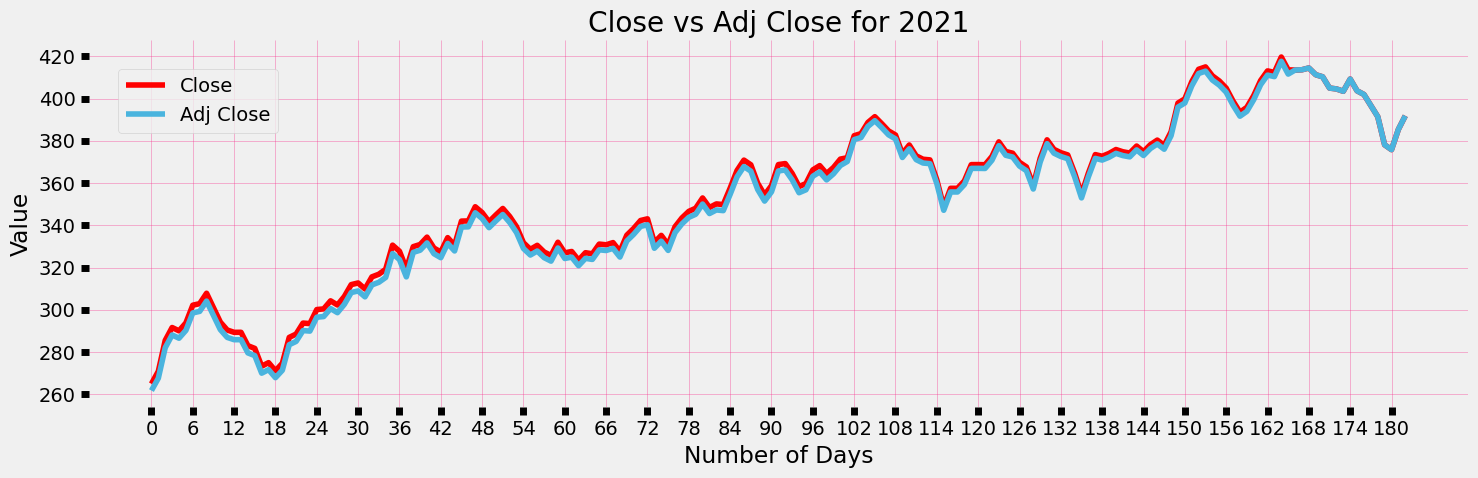

In [11]:
# plt.rcParams is a configuration object that allows you to set various properties and parameters for your Matplotlib plots.
plt.rcParams["axes.linewidth"]="0"

plt.figure(figsize=(15,5))
plt.plot(list(range(df_filtered.Date.size)),df_filtered.Close,label="Close", color = 'red')
plt.plot(list(range(df_filtered.Date.size)),df_filtered['Adj Close'],label="Adj Close", color = '#4ab4de')

plt.tick_params(direction='out', length=6, width=5, colors='k', grid_color='#f6308e', grid_alpha=0.5)

plt.title("Close vs Adj Close for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,df_filtered.Close.size+1,6))
plt.grid(True,linewidth=0.5,alpha=0.5)

plt.legend(borderaxespad=1.5)
plt.tight_layout()

In [12]:
print("Date - Highest Closing Price: ",df_filtered[df_filtered.Close == df_filtered.Close.max()].Date.values[0])
print("Date - Highest Adj Closing Price Date : ",df_filtered[df_filtered['Adj Close'] == max(df_filtered['Adj Close'])].Date.values[0])
print("Date - Lowest Closing Price Date  : ",df_filtered[df_filtered.Close == df_filtered.Close.min()].Date.values[0])
print("Date - Lowest Adj Closing Price Date  : ",df_filtered[df_filtered['Adj Close'] == min(df_filtered['Adj Close'])].Date.values[0])

Date - Highest Closing Price:  2021-08-27
Date - Highest Adj Closing Price Date :  2021-08-27
Date - Lowest Closing Price Date  :  2021-01-04
Date - Lowest Adj Closing Price Date  :  2021-01-04



Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions.

A market-on-close order is simply a market order that is scheduled to trade at the close, at the most recent trading price




In [13]:
print("Distribution Variance for Open vs Close : {:.2f}".format(np.linalg.norm(df_filtered.Open - df_filtered.Close)))

Distribution Variance for Open vs Close : 63.67


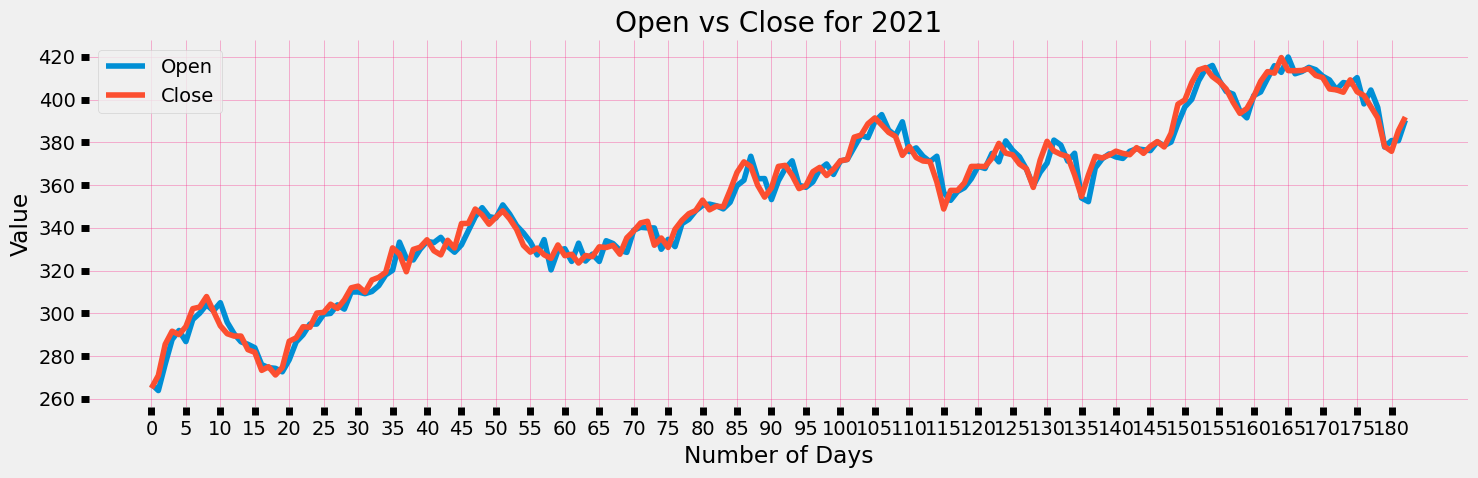

In [14]:
plt.rcParams["axes.linewidth"]="0"

plt.figure(figsize=(15,5))
plt.plot(list(range(df_filtered.Date.size)),df_filtered.Open,label="Open")
plt.plot(list(range(df_filtered.Date.size)),df_filtered.Close,label="Close")

plt.tick_params(direction='out', length=6, width=5, colors='k', grid_color='#f6308e', grid_alpha=0.5)
plt.title("Open vs Close for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,df_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.tight_layout()

In [15]:
print("Highest Opening Price Date : ",df_filtered[df_filtered.Open == df_filtered.Open.max()].Date.values[0])
print("Highest Closing Price Date : ",df_filtered[df_filtered.Close == df_filtered.Close.max()].Date.values[0])

print("Lowest Opening Price Date  : ",df_filtered[df_filtered.Open == df_filtered.Open.min()].Date.values[0])
print("Lowest Closing Price Date  : ",df_filtered[df_filtered.Close == df_filtered.Close.min()].Date.values[0])

Highest Opening Price Date :  2021-08-30
Highest Closing Price Date :  2021-08-27
Lowest Opening Price Date  :  2021-01-05
Lowest Closing Price Date  :  2021-01-04


The open is the starting period of trading on a securities exchange or organized over-the-counter market.

The close is a reference to the end of a trading session in the financial markets when the markets close for the day

In [16]:
print("Distribution Variance for High vs Low   : {:.2f}".format(np.linalg.norm(df_filtered.High - df_filtered.Low)))

Distribution Variance for High vs Low   : 114.22


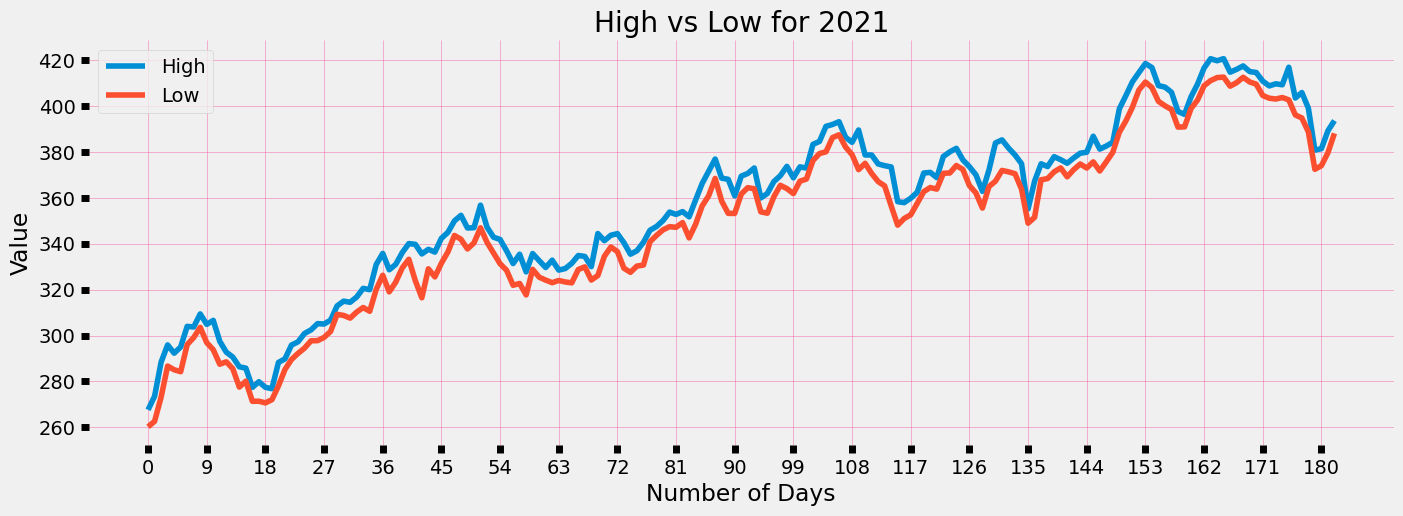

In [17]:
plt.rcParams["axes.linewidth"]="0"

plt.figure(figsize=(15,5))
plt.plot(list(range(df_filtered.Date.size)),df_filtered.High,label="High")
plt.plot(list(range(df_filtered.Date.size)),df_filtered.Low,label="Low")

plt.tick_params(direction='out', length=6, width=5, colors='k', grid_color='#f6308e', grid_alpha=0.5)

plt.title("High vs Low for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,df_filtered.Open.size+1,9))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [18]:
print("Peak High Price Date    : ",df_filtered[df_filtered.High == df_filtered.High.max()].Date.values[0])
print(df_filtered.High.max())
print("Peak Low Price Date     : ",df_filtered[df_filtered.Low == df_filtered.Low.max()].Date.values[0])
print(df_filtered.Low.max())
print("Lowest High Price Date  : ",df_filtered[df_filtered.High == df_filtered.High.min()].Date.values[0])
print(df_filtered.High.min())
print("Lowest Low Price Date   : ",df_filtered[df_filtered.Low == df_filtered.Low.min()].Date.values[0])
print(df_filtered.Low.min())

Peak High Price Date    :  2021-08-30
420.76001
Peak Low Price Date     :  2021-08-30
412.720001
Lowest High Price Date  :  2021-01-04
267.579987
Lowest Low Price Date   :  2021-01-04
260.160004


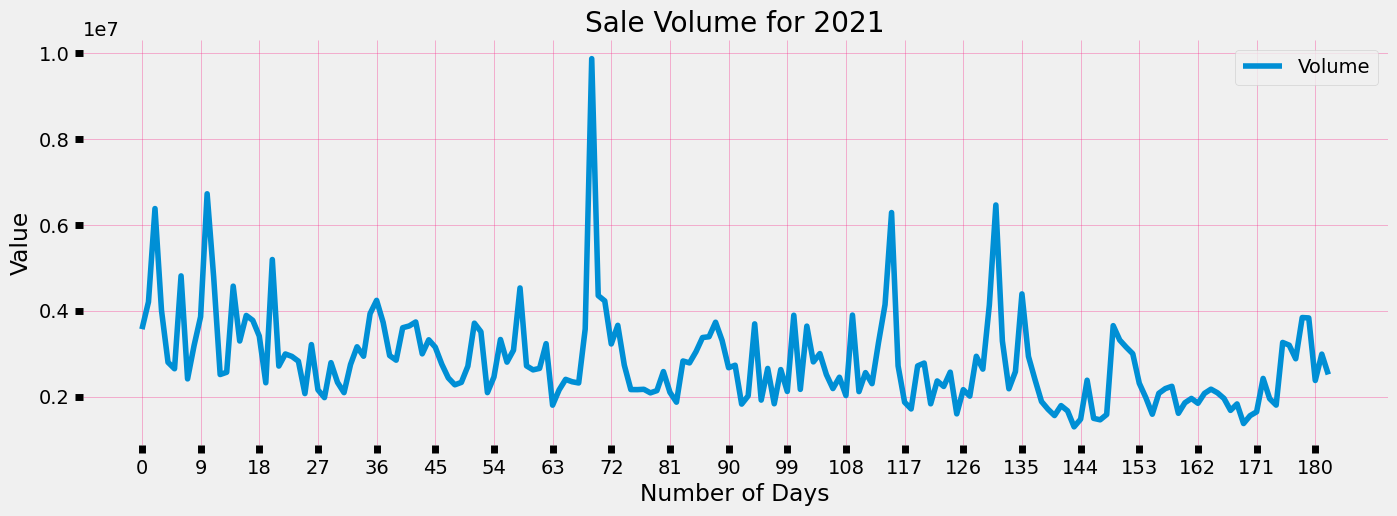

In [19]:
plt.rcParams["axes.linewidth"]="0"

plt.figure(figsize=(15,5))
plt.plot(list(range(df_filtered.Date.size)),df_filtered.Volume,label="Volume")

plt.tick_params(direction='out', length=6, width=5, colors='k', grid_color='#f6308e', grid_alpha=0.5)

plt.title("Sale Volume for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,df_filtered.Open.size+1,9))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [20]:
print("Peak Volume Date   : ",df_filtered[df_filtered.Volume == df_filtered.Volume.max()].Date.values[0])
print("Lowest Volume Date : ",df_filtered[df_filtered.Volume == df_filtered.Volume.min()].Date.values[0])

Peak Volume Date   :  2021-04-14
Lowest Volume Date :  2021-07-29
